In [ ]:
# load libraries needed
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

books = pd.read_csv('./data/Books.csv', low_memory = False)
rating = pd.read_csv('./data/Ratings.csv', low_memory = False)
users = pd.read_csv('./data/Users.csv', low_memory = True)

# drop unnecessary columns
books.drop(axis=1, labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

df = rating.merge(books, how='inner', on='ISBN')
df = df.merge(users, how='inner', on='User-ID')

# drop NaN values
df.dropna(inplace=True)

df = df.drop(['User-ID'],axis=1)

In [ ]:
# extra cleaning for dirty data
#bookAuthor is incorrectly loaded with bookTitle, hence making required corrections
#ISBN '0789466953'
df.loc[df.ISBN == '0789466953','Year-Of-Publication'] = 2000
df.loc[df.ISBN == '0789466953','Book-Author'] = "James Buckley"
df.loc[df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df.loc[df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
df.loc[df.ISBN == '078946697X','Year-Of-Publication'] = 2000
df.loc[df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
df.loc[df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df.loc[df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
df.loc[(df.ISBN == '0789466953') | (df.ISBN == '078946697X'),:]

df.loc[df.ISBN == '2070426769','Year-Of-Publication'] = 2003
df.loc[df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df.loc[df.ISBN == '2070426769','Publisher'] = "Gallimard"
df.loc[df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

df.loc[df.ISBN == '2070426769',:]

df = df.drop(['ISBN'],axis=1)

In [ ]:
le = LabelEncoder()
df['Book-Title'] = le.fit_transform(df['Book-Title'])
df['Book-Author'] = le.fit_transform(df['Book-Author'])
df['Publisher'] = le.fit_transform(df['Publisher'])
df['Location'] = le.fit_transform(df['Location'])

df

,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
1,5,57818,53017,2002,1207,2943,23.0
2,9,51670,63275,1986,12909,2943,23.0
3,8,77319,80306,1994,13558,2943,23.0
4,9,45163,69139,1996,5779,2943,23.0
5,5,168860,13190,1998,639,2943,23.0
...,...,...,...,...,...,...,...
1031130,6,85581,23870,2001,4058,5280,62.0
1031131,7,89014,46306,2002,7394,5280,62.0
1031133,0,29962,48440,2001,12214,586,13.0
1031134,10,69602,3591,1998,11866,586,13.0


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= None,None,None,None
train_x, test_x, train_y, test_y = train_test_split(df.drop(['Book-Rating'],axis=1),
    df['Book-Rating'],random_state=42,train_size=0.8,test_size=0.2,shuffle=True)

In [ ]:
# svm is slow so we're throwing out data
keep_percentage = 0.1  # Keeping 10%

num_samples = len(train_x)
num_samples_to_keep = int(num_samples * keep_percentage)

random_indices_to_keep = np.random.choice(num_samples, num_samples_to_keep, replace=False)

# Filter the data based on random indices using iloc
train_x = train_x.iloc[random_indices_to_keep]
train_y = train_y.iloc[random_indices_to_keep]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scaling the data
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [ ]:
# Training the SVM classifier
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(train_x_scaled, train_y)

SVC()

In [ ]:
# Evaluating the model
results_dict = {
    'Accuracy': 0,
    'Precision': 0,
    'Recall': 0
}

predicted_labels = support_vector_classifier.predict(test_x_scaled)

results_dict['Accuracy'] = accuracy_score(test_y, predicted_labels)
results_dict['Precision'] = precision_score(test_y, predicted_labels, average='macro')
results_dict['Recall'] = recall_score(test_y, predicted_labels, average='macro')

results_dict

/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.6421877074206823,
 'Precision': 0.05838070067460748,
 'Recall': 0.09090909090909091}

/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/savan/opt/anaconda3/envs/cis477/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning:

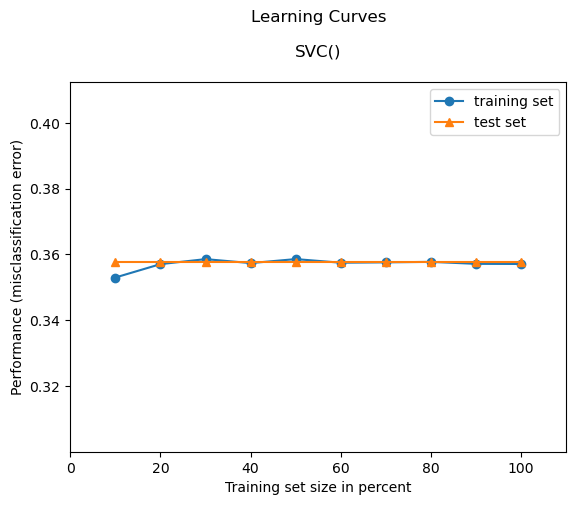

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt

# Plotting learning curve
plot_learning_curves(X_test=test_x, y_test=test_y, clf=support_vector_classifier, X_train=train_x_scaled, y_train=train_y)
plt.show()